## call "~/.local/bin/poetry" if poetry keyword not working on mac

In [1]:

# TODO split based on farms


# (iin both ground truth & supervised) remove images before May 1st, remove everything after Sept 30
# drop duplicates based on BANDS

# for image-pair level:(what we have rn)
# keep the images after harvest event removed


# for farm level:
# do not remove images after har_evnt==True in ground truth set


# TODO show pinned points for grounTruth set & later the other set

In [2]:
import datetime
import geopandas
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
#local scripts

from scripts import veg_indices, utilities, plots
#from scripts.utilities import *

In [5]:
# cpied from learning_about-data.ipynb
BANDS_DICT = {   'B2': 'Blue',
            'B3': 'Green',
            'B4': 'Red',
            'B5': 'Red_Edge_1',
            'B6': 'Red_Edge_2',
            'B7': 'Red_Edge_3',
            'B8': 'NIR',
            'B8A': 'Red_Edge_4',
            'B11': 'SWIR_1',
            'B12': 'SWIR_2'}

BANDS = list(BANDS_DICT.keys())

In [6]:
NUMERIC_COLS = ['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12','RVI',
                'ARVI','PSSRa','NDI45','GNDVI','MCARI','IRECI','CIr','MTCI',
                'NDVIre','NIRv','EVI','NDTI','NDMI','MSI','GCI','NBRI','BSI',
                'NDWI','NDSI','NDVI','RVI_diff','ARVI_diff','PSSRa_diff',
                'NDI45_diff','GNDVI_diff','MCARI_diff','IRECI_diff','CIr_diff',
                'MTCI_diff','NDVIre_diff','NIRv_diff','EVI_diff','NDTI_diff',
                'NDMI_diff','MSI_diff','GCI_diff','NBRI_diff','BSI_diff','NDWI_diff',
                'NDSI_diff','NDVI_diff','RVI_prev','ARVI_prev','PSSRa_prev','NDI45_prev',
                'GNDVI_prev','MCARI_prev','IRECI_prev','CIr_prev','MTCI_prev','NDVIre_prev',
                'NIRv_prev','EVI_prev','NDTI_prev','NDMI_prev','MSI_prev','GCI_prev',
                'NBRI_prev','BSI_prev','NDWI_prev','NDSI_prev','NDVI_prev']

NUM_SAMPLES = 16

In [7]:
file_name = "merged_images_supSpecSmall"
df = geopandas.read_file(f'../data/{file_name}')

file_name = "merged_images_groundTruth"
test_df = geopandas.read_file(f'../data/{file_name}')

In [8]:
test_df

,level_0,INDEX,index,B11,B12,B2,B3,B4,B5,B6,...,NDTI_diff,NDMI_diff,MSI_diff,GCI_diff,NBRI_diff,BSI_diff,NDWI_diff,NDSI_diff,NDVI_diff,geometry
0,471,p0,0,0.10220,0.05830,0.02430,0.04060,0.03010,0.06090,0.15930,...,-0.010887,-0.015458,0.015318,-2.387276,-0.018594,0.043001,0.071601,0.111970,-0.068468,POINT (25.45868 50.65505)
1,992,p0,0,0.27800,0.20210,0.06640,0.08890,0.12160,0.14460,0.15380,...,-0.115428,-0.622202,1.113706,-4.014119,-0.669704,0.576486,0.373494,-0.084027,-0.583545,POINT (25.45868 50.65505)
2,1442,p0,0,0.31440,0.25520,0.10555,0.13110,0.14550,0.16945,0.19885,...,-0.054159,0.043914,-0.133061,-0.327222,-0.009570,-0.070367,0.079081,0.103951,0.016581,POINT (25.45868 50.65505)
3,0,p1,1,0.19350,0.12115,0.05555,0.11180,0.08315,0.15910,0.29700,...,0.056745,0.168363,-0.260791,0.006449,0.205095,-0.065378,-0.000930,0.150379,0.008652,POINT (36.28947 50.29463)
4,472,p1,1,0.16650,0.10055,0.03895,0.07675,0.04825,0.13585,0.28785,...,0.017019,0.074468,-0.093770,1.284088,0.076297,-0.103619,-0.137469,-0.101356,0.157545,POINT (36.28947 50.29463)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,470,p557,557,0.26815,0.18880,0.04520,0.07640,0.07820,0.13260,0.24630,...,0.057579,0.077533,-0.154172,1.021938,0.133201,-0.045545,-0.111611,-0.056209,0.095066,POINT (30.63346 46.99445)
1678,991,p557,557,0.26310,0.17285,0.05730,0.08280,0.07630,0.13005,0.24705,...,0.033368,0.009485,-0.017300,-0.295318,0.041680,-0.027766,0.027074,0.035274,0.008140,POINT (30.63346 46.99445)
1679,1441,p557,557,0.26555,0.20460,0.05375,0.08270,0.08220,0.13930,0.23830,...,-0.077380,-0.026477,0.049093,-0.146886,-0.101614,0.035674,0.014826,-0.003805,-0.040197,POINT (30.63346 46.99445)
1680,1893,p557,557,0.25080,0.20830,0.04920,0.07350,0.07710,0.11045,0.16870,...,-0.037067,-0.163863,0.370961,-0.796163,-0.201016,0.135376,0.101519,-0.021662,-0.123098,POINT (30.63346 46.99445)


In [9]:

def get_ordered_rdm_forests_features():
    # first one is the most important
    return ['RVI_diff', 'B5', 'B4', 'NDVI_diff', 'ARVI_diff', 'EVI_diff', 'B3',
       'B2', 'GNDVI_diff', 'IRECI_diff', 'ARVI', 'NDVIre_diff', 'NDWI_diff',
       'NDMI_diff', 'BSI_diff', 'B6', 'PSSRa_diff', 'B11', 'B7', 'NDSI',
       'CIr_diff', 'NDVIre', 'ARVI_prev', 'NDTI', 'MTCI', 'MSI_diff', 'B8',
       'NDI45', 'EVI_prev', 'MCARI_prev', 'NDTI_prev', 'GCI_diff', 'NDSI_prev',
       'IRECI_prev', 'MTCI_diff', 'B8A', 'BSI', 'BSI_prev', 'MCARI_diff',
       'MSI', 'NBRI_diff', 'CIr', 'NDI45_prev', 'RVI', 'NIRv_prev', 'MCARI',
       'NDSI_diff', 'NDTI_diff', 'PSSRa', 'GNDVI', 'NIRv', 'B12', 'NBRI',
       'MSI_prev', 'NDMI', 'NDWI', 'NDVI_prev', 'NDVI', 'CIr_prev', 'IRECI',
       'NIRv_diff', 'NDI45_diff', 'NBRI_prev', 'GCI', 'EVI', 'RVI_prev',
       'NDVIre_prev', 'NDWI_prev', 'NDMI_prev', 'PSSRa_prev', 'GNDVI_prev',
       'GCI_prev', 'MTCI_prev']
    

SELECTED_FEATURES = ['NDVI', 'RVI', 'BSI', 'MCARI_prev', 'B4']
#SELECTED_FEATURES = NUMERIC_COLS
#SELECTED_FEATURES = train_df[SELECTED_FEATURES].dropna(axis=1).columns


#SELECTED_FEATURES = get_ordered_rdm_forests_features()[:5] # get top N features

print("selected features:", SELECTED_FEATURES)

def get_X_y(dataframe: pd.DataFrame):
    df_X = dataframe[SELECTED_FEATURES]
    #df_X = df_X.dropna(axis=1)
    X = df_X.to_numpy().reshape((df_X.shape[0], df_X.shape[1], 1))
    y = dataframe["har_evnt"].to_numpy().astype(np.float32)
    return X, y

selected features: ['NDVI', 'RVI', 'BSI', 'MCARI_prev', 'B4']


# Separate by Farm

In [10]:
from sklearn.model_selection import train_test_split

def separate_by_farm(df:pd.DataFrame):
    points_df_list = []
    for p in  df['point_idx'].unique(): # ['p0','p1','p2','p3','p4', ...]
        curr_df = df[df["point_idx"] == p]
        points_df_list.append(curr_df)
    len(points_df_list)

    training_df_list, validation_df_list = train_test_split(points_df_list, train_size=0.8, random_state=42)

    print(len(training_df_list))
    print(len(validation_df_list))

    # combine into two dataframes
    train_df = pd.concat(training_df_list)
    validate_df = pd.concat(validation_df_list)
    print(train_df.shape, validate_df.shape)
    
    return train_df, validate_df

validate_df, train_df = separate_by_farm(df)

292
73
(664, 85) (160, 85)


# Random Upsampling

In [11]:
#%%script echo skipping
def apply_random_upsampling(df):
    har_evnt_true_df = df[df["har_evnt"]]
    har_evnt_false_df = df[df["har_evnt"] == False]
    print(har_evnt_true_df.shape)
    print(har_evnt_false_df.shape)

    from sklearn.utils import resample

    upsampled_har_evnt_true_df = resample(har_evnt_true_df, n_samples=har_evnt_false_df.shape[0],
                                                    replace=True, random_state=42)
    print(upsampled_har_evnt_true_df.shape)

    return pd.concat([upsampled_har_evnt_true_df, har_evnt_false_df])
    print(df.shape)

train_df = apply_random_upsampling(train_df)

(55, 85)
(105, 85)
(105, 85)


# Convert to Numpy

In [12]:
X_train, y_train = get_X_y(train_df)
print(X_train.shape, y_train.shape)

X_validate, y_validate = get_X_y(validate_df)
print(X_validate.shape, y_validate.shape)

X_test, y_test = get_X_y(test_df)
print(X_test.shape, y_test.shape)

(210, 5, 1) (210,)
(664, 5, 1) (664,)
(1682, 5, 1) (1682,)


In [13]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
model = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    #BatchNormalization(),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [15]:
metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()] # because imbalanced data
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_validate, y_validate), callbacks=[callback])

Epoch 1/200


2023-05-24 08:17:21.350821: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 0s 21ms/step - loss: 0.6955 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6721 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6892 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6784 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6858 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6690 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6805 - precision: 0.7551 - recall: 0.3524 - val_loss: 0.6652 - val_precision: 0.5203 - val_recall: 0.7264
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6757 - precision: 0.6577 - recall: 0.6952 - val_loss: 0.6507 - val_precision: 0.5546 - val_recall: 0.5991
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - lo

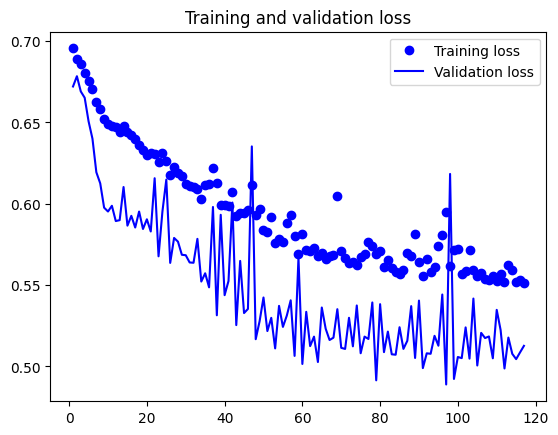

In [17]:
import matplotlib.pyplot as plt

#acc = history.history['binary_accuracy']
#val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
import sklearn
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


def plot_confusion_matrix(actual, predicted):
    print(metrics.confusion_matrix(actual, predicted))
    confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize='true')

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    


In [19]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

def get_prediction_nn(X_in, model):
    y_predict = np.array(list(model.predict(X_in)))
    y_predict = y_predict.reshape(y_predict.shape[0])
    return y_predict

def evaluate(X_in: np.ndarray, y_in:np.array, y_predict:np.array, threshold:int=None):
    if not threshold:
        thresholds = np.arange(0, 1, 0.001) # define thresholds
        # evaluate each threshold
        scores = [metrics.f1_score(y_in, to_labels(y_predict, t)) for t in thresholds]
        idx = np.argmax(scores)
        threshold = thresholds[idx]
        print("F1 Score:", scores[idx])
    print("Threshold:", threshold)
    func = np.vectorize(lambda x: 0 if x < threshold else 1)
    print(np.unique(func(y_predict), return_counts=True))
    print(sklearn.metrics.classification_report(y_in, func(y_predict)))
    plot_confusion_matrix(y_in, func(y_predict))

X_train
7/7 [==============================] - 0s 563us/step
F1 Score: 0.7607843137254902
Threshold: 0.28800000000000003
(array([0, 1]), array([ 60, 150]))
              precision    recall  f1-score   support

         0.0       0.87      0.50      0.63       105
         1.0       0.65      0.92      0.76       105

    accuracy                           0.71       210
   macro avg       0.76      0.71      0.70       210
weighted avg       0.76      0.71      0.70       210

[[52 53]
 [ 8 97]]


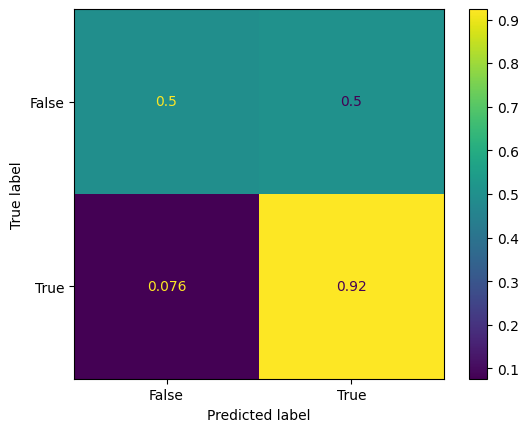

In [20]:
print("X_train")
evaluate(X_train, y_train, get_prediction_nn(X_train, model))

X_validate
21/21 [==============================] - 0s 450us/step
F1 Score: 0.6952595936794582
Threshold: 0.591
(array([0, 1]), array([433, 231]))
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       452
         1.0       0.67      0.73      0.70       212

    accuracy                           0.80       664
   macro avg       0.77      0.78      0.77       664
weighted avg       0.80      0.80      0.80       664

[[375  77]
 [ 58 154]]


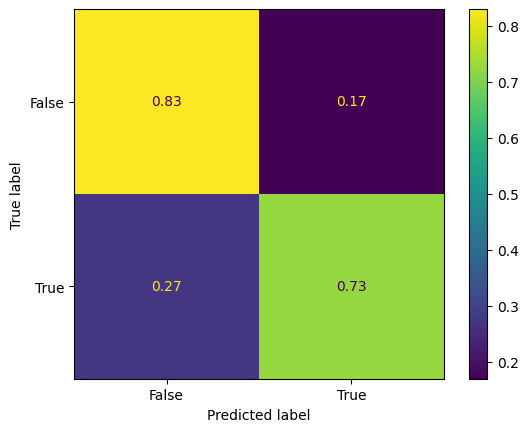

In [21]:
print("X_validate")
evaluate(X_validate, y_validate, get_prediction_nn(X_validate, model))

X_test
53/53 [==============================] - 0s 416us/step
F1 Score: 0.5416178194607268
Threshold: 0.5740000000000001
(array([0, 1]), array([1141,  541]))
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84      1370
         1.0       0.43      0.74      0.54       312

    accuracy                           0.77      1682
   macro avg       0.68      0.76      0.69      1682
weighted avg       0.84      0.77      0.79      1682

[[1060  310]
 [  81  231]]


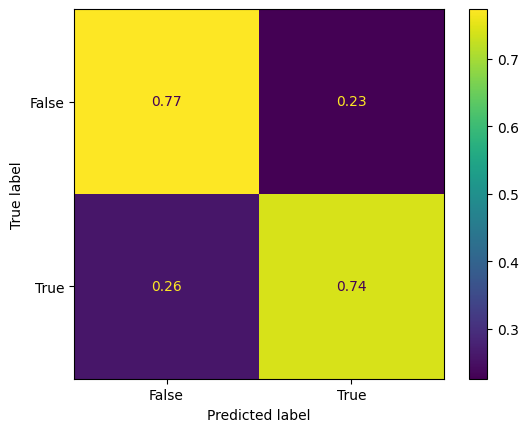

In [22]:
print("X_test")
evaluate(X_test, y_test, get_prediction_nn(X_test, model))

# Random Forests Feature Selection

In [23]:


def rm_extradim(X, y):
    X, y = X.reshape(X.shape[0], X.shape[1]), y.reshape(y.shape[0])
    return X, y
    

X_train, y_train = rm_extradim(X_train, y_train)
X_validate, y_validate = rm_extradim(X_validate, y_validate)
X_test, y_test = rm_extradim(X_test, y_test)

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

X_train
F1 Score: 1.0
Threshold: 0.001
(array([0, 1]), array([105, 105]))
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       105
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

[[105   0]
 [  0 105]]


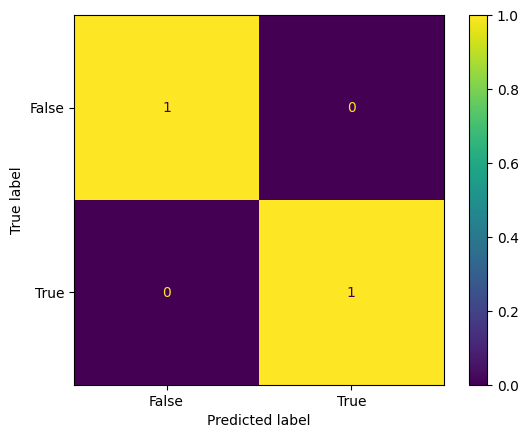

In [24]:
print("X_train")
y_predict = rf.predict(X_train)
evaluate(X_train, y_train, y_predict)

X_validate
F1 Score: 0.6367924528301887
Threshold: 0.001
(array([0, 1]), array([452, 212]))
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       452
         1.0       0.64      0.64      0.64       212

    accuracy                           0.77       664
   macro avg       0.73      0.73      0.73       664
weighted avg       0.77      0.77      0.77       664

[[375  77]
 [ 77 135]]


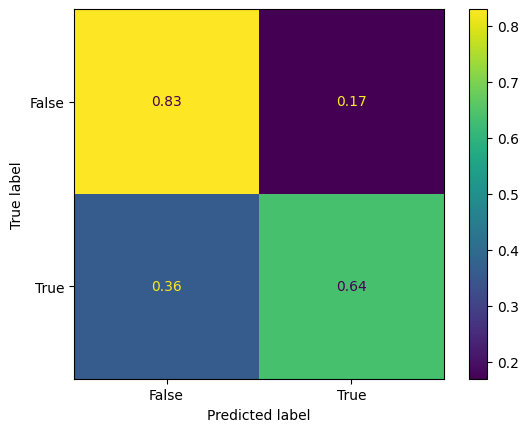

In [25]:
print("X_validate")
y_predict = rf.predict(X_validate)
evaluate(X_validate, y_validate, y_predict)

X_test
F1 Score: 0.5281173594132029
Threshold: 0.001
(array([0, 1]), array([1176,  506]))
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      1370
         1.0       0.43      0.69      0.53       312

    accuracy                           0.77      1682
   macro avg       0.67      0.74      0.69      1682
weighted avg       0.83      0.77      0.79      1682

[[1080  290]
 [  96  216]]


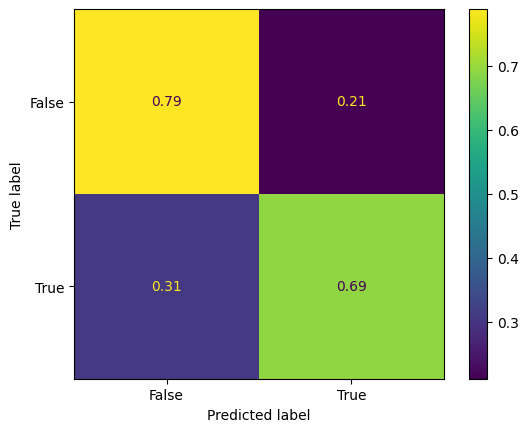

In [26]:
print("X_test")

y_predict = rf.predict(X_test)
evaluate(X_test, y_test, y_predict)

In [27]:
np.unique(y_train, return_counts=True)

(array([0., 1.], dtype=float32), array([105, 105]))

In [28]:
feature_importances_df = pd.DataFrame(rf.feature_importances_,
                    index=SELECTED_FEATURES, 
                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_df

,importance
B4,0.306784
MCARI_prev,0.179176
NDVI,0.178707
RVI,0.167960
BSI,0.167373


In [29]:
feature_importances_df.T.columns

Index(['B4', 'MCARI_prev', 'NDVI', 'RVI', 'BSI'], dtype='object')

In [30]:
df


,level_0,INDEX,index,B11,B12,B2,B3,B4,B5,B6,...,NDTI_diff,NDMI_diff,MSI_diff,GCI_diff,NBRI_diff,BSI_diff,NDWI_diff,NDSI_diff,NDVI_diff,geometry
0,0,p2552,2552,0.23650,0.16900,0.04935,0.0801,0.1035,0.14255,0.17240,...,-0.044877,-0.279841,0.490136,-1.112650,-0.304765,0.277223,0.130734,-0.084003,-0.285695,POINT (33.75093 46.34732)
1,293,p2552,2552,0.24800,0.19840,0.06410,0.0802,0.1104,0.11960,0.14190,...,-0.055350,-0.129529,0.341772,-0.509485,-0.187725,0.076637,0.091216,-0.017275,-0.129710,POINT (33.75093 46.34732)
2,639,p2552,2552,0.38320,0.27630,0.12740,0.1784,0.2382,0.25630,0.26410,...,0.050981,0.090585,-0.249371,-0.343894,0.144338,-0.042790,0.080652,0.146601,-0.072076,POINT (33.75093 46.34732)
3,1,p2553,2553,0.26630,0.16070,0.06420,0.0910,0.0974,0.14350,0.23670,...,0.019594,-0.049278,0.090105,-0.686246,-0.026372,0.066846,0.071390,0.038415,-0.139560,POINT (28.99082 46.27818)
4,294,p2553,2553,0.32930,0.20170,0.11160,0.1502,0.1930,0.20990,0.28560,...,-0.007005,0.013523,-0.025581,-0.703414,0.005641,0.027794,0.103517,0.117110,-0.187788,POINT (28.99082 46.27818)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,636,p2915,2915,0.24150,0.19230,0.05940,0.0778,0.1034,0.12810,0.15020,...,-0.069473,-0.217795,0.472025,-1.010073,-0.284208,0.199805,0.139659,-0.029283,-0.303047,POINT (37.55013 49.47152)
820,1458,p2915,2915,0.29505,0.23865,0.15930,0.1699,0.1726,0.19605,0.21915,...,0.026466,0.144171,-0.423148,-0.704156,0.173934,-0.155753,0.185879,0.285999,-0.135844,POINT (37.55013 49.47152)
821,292,p2916,2916,0.21285,0.14305,0.06380,0.1059,0.0925,0.18265,0.30590,...,0.010076,-0.071292,0.087519,-0.333672,-0.053577,0.083797,0.033674,-0.025918,-0.072551,POINT (31.13430 46.74777)
822,637,p2916,2916,0.31570,0.22730,0.08100,0.1136,0.1554,0.19950,0.23225,...,-0.033323,-0.314506,0.546820,-0.888360,-0.326990,0.291148,0.121879,-0.135237,-0.306382,POINT (31.13430 46.74777)
